In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import norm

In [32]:
df = pd.read_csv("Machine Downtime.csv")
df

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,1/2/2022,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,1/2/2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


# 1.Data Exploration

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(?C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(?C)  2493 non-null   float64
 9   Spindle_Vibration(?m)            2489 non-null   float64
 10  Tool_Vibration(?m)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [34]:
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [35]:
df.tail(10)

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
2490,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,55.540000,4.841605,6.852283,26.4,42.9,36.2,1.436,24.819,26526.0,348.0,15.119739,2.53,Machine_Failure
2491,1/2/2022,Makino-L2-Unit1-2015,Shopfloor-L2,90.530000,6.839413,5.698765,9.4,52.5,40.9,1.271,31.573,27613.0,377.0,16.964105,3.67,Machine_Failure
2492,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,137.370000,4.842521,6.136585,21.5,49.6,42.3,0.432,37.423,19536.0,402.0,24.437039,2.84,Machine_Failure
2493,1/2/2022,Makino-L3-Unit1-2015,Shopfloor-L3,106.388881,5.211753,6.131135,22.3,50.7,38.7,0.989,36.265,17726.0,297.0,31.521075,2.02,No_Machine_Failure
2494,1/2/2022,Makino-L2-Unit1-2015,Shopfloor-L2,131.894307,5.221555,6.573392,22.4,45.5,32.5,1.276,23.430,20978.0,390.0,22.757270,2.94,No_Machine_Failure
2495,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,1/2/2022,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,1/2/2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure
2499,1/2/2022,Makino-L2-Unit1-2015,Shopfloor-L2,96.690000,5.936610,7.109355,29.8,53.2,36.2,0.840,31.580,23576.0,385.0,24.409551,3.55,Machine_Failure


In [36]:
df.shape

(2500, 16)

In [37]:
num_duplicates = df.duplicated().sum()

print(f"nm row etr: {num_duplicates}")

nm row etr: 0


In [38]:
df.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


# 2.Data Cleaning 

Missing Values 

In [39]:
df.nunique()

Date                                164
Machine_ID                            3
Assembly_Line_No                      3
Hydraulic_Pressure(bar)            1977
Coolant_Pressure(bar)              1628
Air_System_Pressure(bar)           2472
Coolant_Temperature                 275
Hydraulic_Oil_Temperature(?C)       209
Spindle_Bearing_Temperature(?C)     204
Spindle_Vibration(?m)              1144
Tool_Vibration(?m)                 2350
Spindle_Speed(RPM)                 1180
Voltage(volts)                      238
Torque(Nm)                         1327
Cutting(kN)                         170
Downtime                              2
dtype: int64

In [40]:
df.isna().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(?C)      16
Spindle_Bearing_Temperature(?C)     7
Spindle_Vibration(?m)              11
Tool_Vibration(?m)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [41]:
df.shape

(2500, 16)

In [42]:
null_column = df[['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
                 'Coolant_Temperature', 'Hydraulic_Oil_Temperature(?C)', 'Spindle_Bearing_Temperature(?C)',
                 'Spindle_Vibration(?m)', 'Tool_Vibration(?m)', 'Spindle_Speed(RPM)', 'Voltage(volts)', 
                 'Torque(Nm)', 'Cutting(kN)']]
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df[['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
    'Coolant_Temperature', 'Hydraulic_Oil_Temperature(?C)', 'Spindle_Bearing_Temperature(?C)',
    'Spindle_Vibration(?m)', 'Tool_Vibration(?m)', 'Spindle_Speed(RPM)', 'Voltage(volts)', 
    'Torque(Nm)', 'Cutting(kN)']] = imp.fit_transform(null_column)


In [43]:
df.isna().sum()

Date                               0
Machine_ID                         0
Assembly_Line_No                   0
Hydraulic_Pressure(bar)            0
Coolant_Pressure(bar)              0
Air_System_Pressure(bar)           0
Coolant_Temperature                0
Hydraulic_Oil_Temperature(?C)      0
Spindle_Bearing_Temperature(?C)    0
Spindle_Vibration(?m)              0
Tool_Vibration(?m)                 0
Spindle_Speed(RPM)                 0
Voltage(volts)                     0
Torque(Nm)                         0
Cutting(kN)                        0
Downtime                           0
dtype: int64

In [44]:
df.shape

(2500, 16)

Outliers

In [45]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    outliers = detect_outliers_iqr(df[col])
    if not outliers.empty:
        print(f"Outliers in column '{col}':")
        print(outliers)

Outliers in column 'Hydraulic_Pressure(bar)':
2058   -14.326454
Name: Hydraulic_Pressure(bar), dtype: float64
Outliers in column 'Coolant_Pressure(bar)':
851    11.350
853    11.300
913     0.325
Name: Coolant_Pressure(bar), dtype: float64
Outliers in column 'Air_System_Pressure(bar)':
125     5.091411
674     5.063480
739     7.971607
800     7.804750
1135    7.712441
1190    7.973992
1659    7.781151
1910    5.329777
2101    5.151876
2102    5.305506
2147    7.644786
2280    5.283833
Name: Air_System_Pressure(bar), dtype: float64
Outliers in column 'Coolant_Temperature':
1035    98.2
Name: Coolant_Temperature, dtype: float64
Outliers in column 'Hydraulic_Oil_Temperature(?C)':
127     37.1
337     57.9
375     36.4
534     59.5
588     61.4
597     37.4
614     59.2
724     36.9
825     35.2
1002    60.3
1231    37.5
1265    58.1
1342    59.5
1536    36.2
1602    59.1
1728    57.7
1733    36.1
1999    59.2
2177    58.7
2427    57.9
2453    35.8
Name: Hydraulic_Oil_Temperature(?C), dty

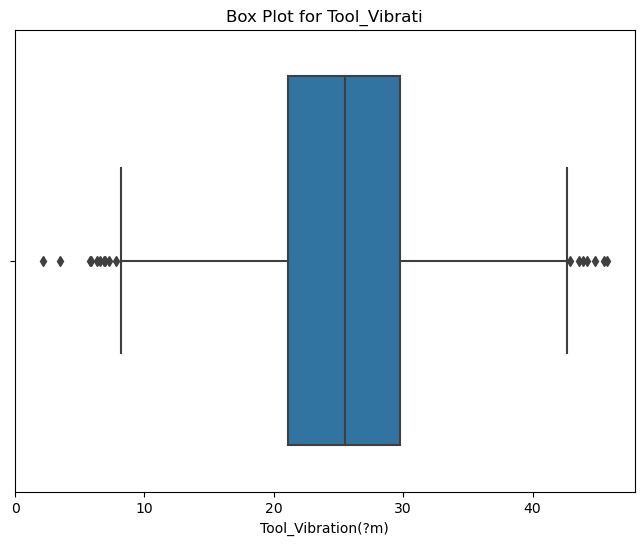

In [46]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=df['Tool_Vibration(?m)'])   
plt.title('Box Plot for Tool_Vibrati')  
plt.show()

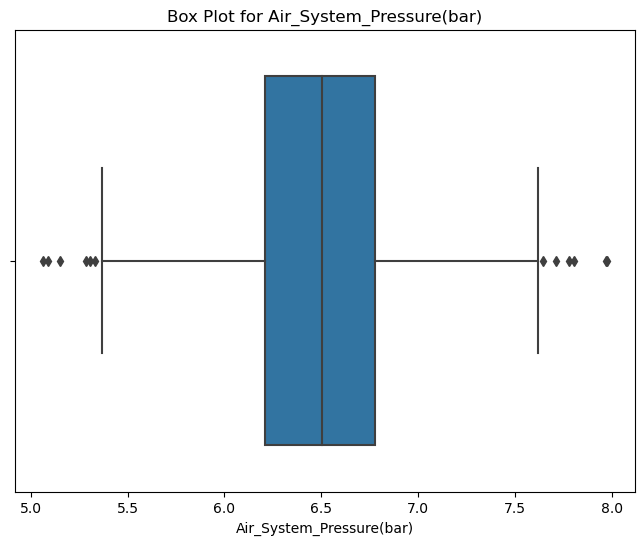

In [47]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=df['Air_System_Pressure(bar)'])   
plt.title('Box Plot for Air_System_Pressure(bar)')  
plt.show()

# 3.Data Visualisation

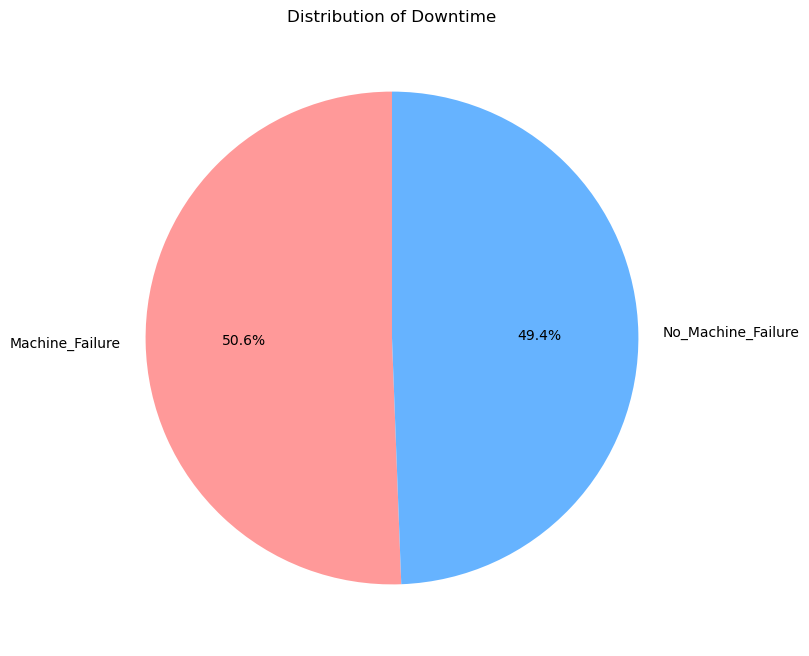

In [48]:
downtime_counts = df['Downtime'].value_counts()
plt.figure(figsize=(8, 8))
downtime_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Downtime')
plt.ylabel('')  
plt.show()

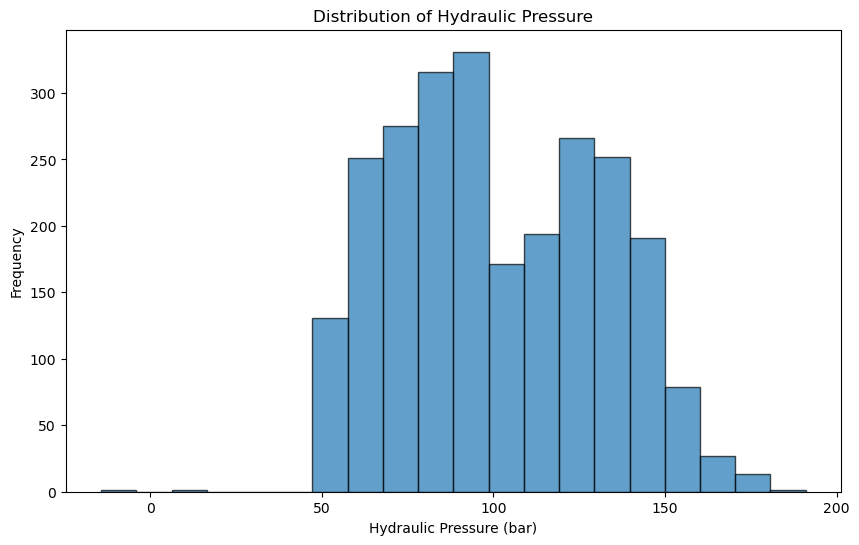

In [49]:
import matplotlib.pyplot as plt
import numpy as np
pressure_data = df['Hydraulic_Pressure(bar)'].to_numpy()
plt.figure(figsize=(10, 6))
plt.hist(pressure_data, bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Hydraulic Pressure')
plt.xlabel('Hydraulic Pressure (bar)')
plt.ylabel('Frequency')
plt.show()

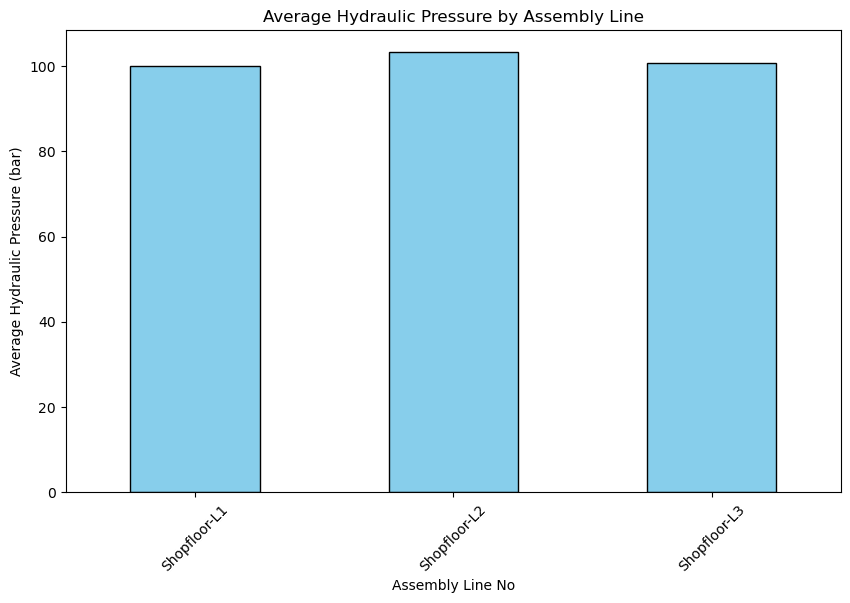

In [50]:
grouped_data = df.groupby('Assembly_Line_No')['Hydraulic_Pressure(bar)'].mean()
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Hydraulic Pressure by Assembly Line')
plt.xlabel('Assembly Line No')
plt.ylabel('Average Hydraulic Pressure (bar)')
plt.xticks(rotation=45)  
plt.show()

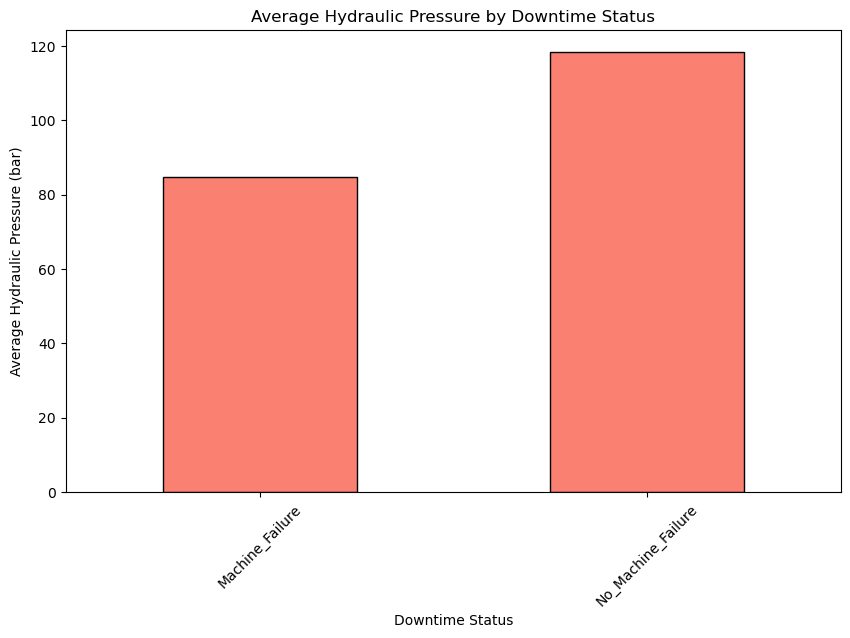

In [51]:
grouped_data = df.groupby('Downtime')['Hydraulic_Pressure(bar)'].mean()
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Average Hydraulic Pressure by Downtime Status')
plt.xlabel('Downtime Status')
plt.ylabel('Average Hydraulic Pressure (bar)')
plt.xticks(rotation=45)  
plt.show()

<Axes: xlabel='Downtime'>

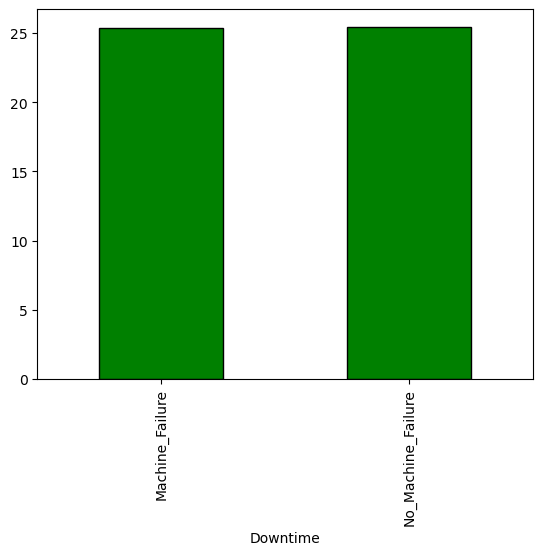

In [52]:
grouped_data = df.groupby('Downtime')['Tool_Vibration(?m)'].mean()
grouped_data.plot(kind='bar', color='green', edgecolor='black')

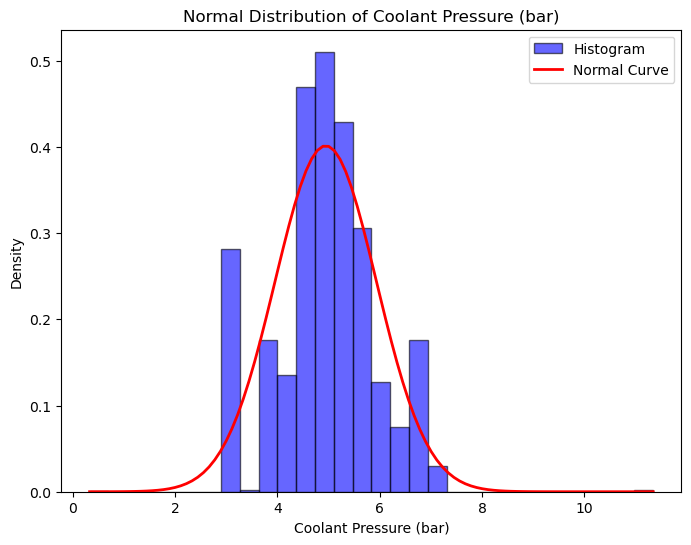

In [53]:
data = df['Coolant_Pressure(bar)']
mean = np.mean(data)
std = np.std(data)
x = np.linspace(min(data), max(data), 100)
y = norm.pdf(x, mean, std)
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black', label='Histogram')
plt.plot(x, y, 'r-', linewidth=2, label='Normal Curve')
plt.title('Normal Distribution of Coolant Pressure (bar)')
plt.xlabel('Coolant Pressure (bar)')
plt.ylabel('Density')
plt.legend()
plt.show()